# Alucar - Analisando as vendas 

## Pacotes

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## Lendo Arquivos

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f"Quantidade de linha e colunas: {alucar.shape}")

Quantidade de linha e colunas: (24, 2)


In [5]:
print(f"Qauntidade nulos: {alucar.isna().sum().sum()}")

Qauntidade nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'] )
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head(2)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20


<AxesSubplot:xlabel='mes', ylabel='vendas'>

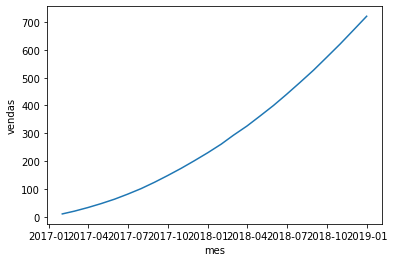

In [9]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

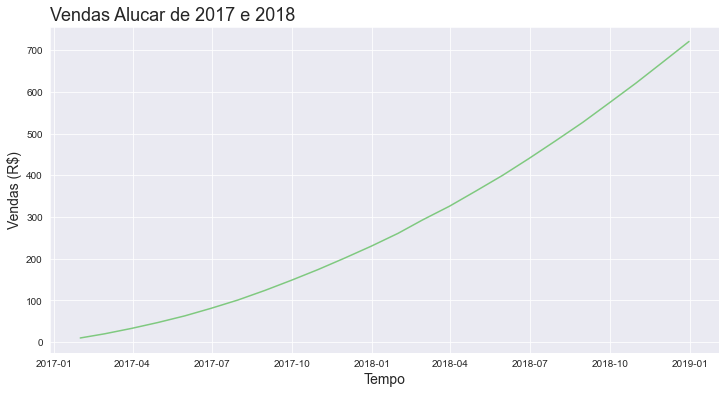

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax


In [11]:
# Decompondo preços
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(3)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0


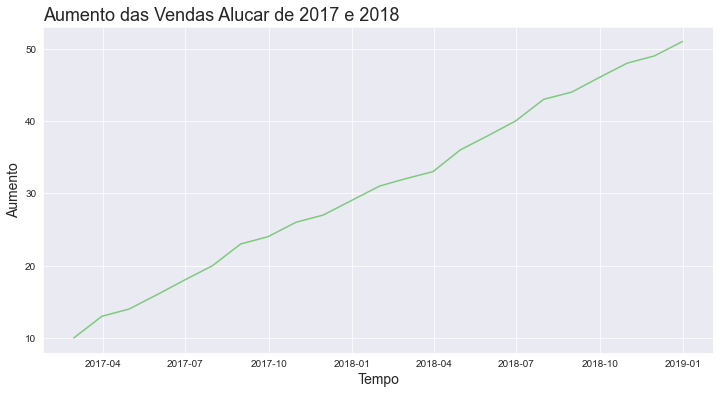

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [13]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset: dict, fontt: int, fontlx: int, fontly: int) -> dict: 
    """Função para plotagem de gráfico"""
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=fontt)
    ax.set_xlabel(labelx, fontsize=fontlx)
    ax.set_ylabel(labely, fontsize=fontly)
    ax = ax
    return ax


<AxesSubplot:title={'left':'Aumento das Vendas Alucar de 2017 e 2018'}, xlabel='Tempo', ylabel='Aumento'>

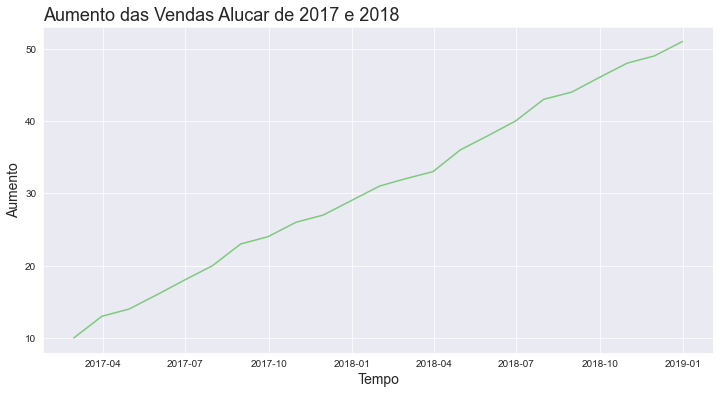

In [14]:
plotar(
    titulo='Aumento das Vendas Alucar de 2017 e 2018', 
    labelx='Tempo', 
    labely='Aumento', 
    x='mes', 
    y='aumento', 
    dataset=alucar, 
    fontt=18, 
    fontlx=14, 
    fontly=14 )

In [15]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head(3)

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0


<AxesSubplot:title={'left':'Aceleracao das Vendas Alucar de 2017 e 2018'}, xlabel='Tempo', ylabel='Aceleração'>

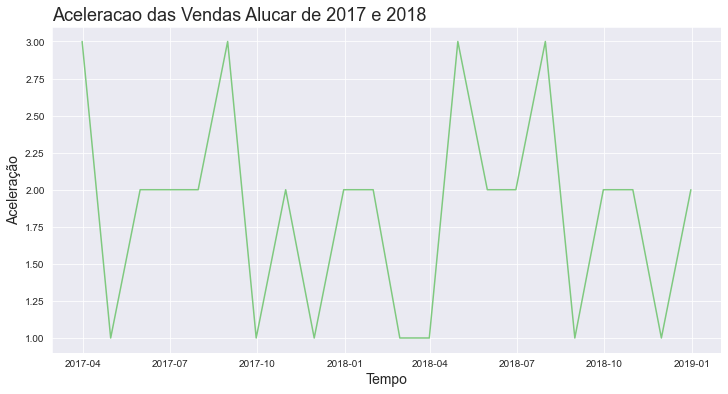

In [16]:
plotar(
    titulo='Aceleracao das Vendas Alucar de 2017 e 2018', 
    labelx='Tempo', 
    labely='Aceleração', 
    x='mes', 
    y='aceleracao', 
    dataset=alucar, 
    fontt=18, 
    fontlx=14, 
    fontly=14 )

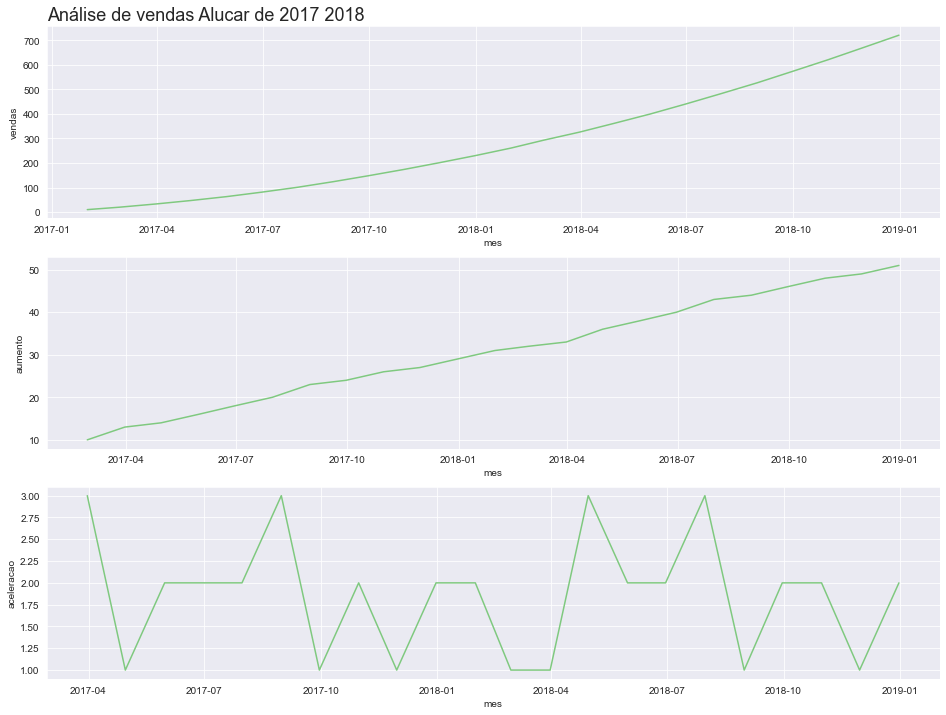

In [17]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas Alucar de 2017 2018', fontsize=18, loc='left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar) 
ax = plt.subplot(3,1,2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar) 
ax = plt.subplot(3,1,3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar) 
ax = ax

In [77]:
def plot_comparacao(x, y1,y2,y3, y4=None, params=False, dataset=None, titulo=None):
    plt.figure(figsize=(16,12))
    if params:
        ax = plt.subplot(4,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(4,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(4,1,3)
        sns.lineplot(x = x, y = y3, data = dataset) 
        ax = plt.subplot(4,1,4)
        sns.lineplot(x = x, y = y4, data = dataset)     
    else:
        ax = plt.subplot(3,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(3,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(3,1,3)
        sns.lineplot(x = x, y = y3, data = dataset)  
    ax = ax
    return ax

<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

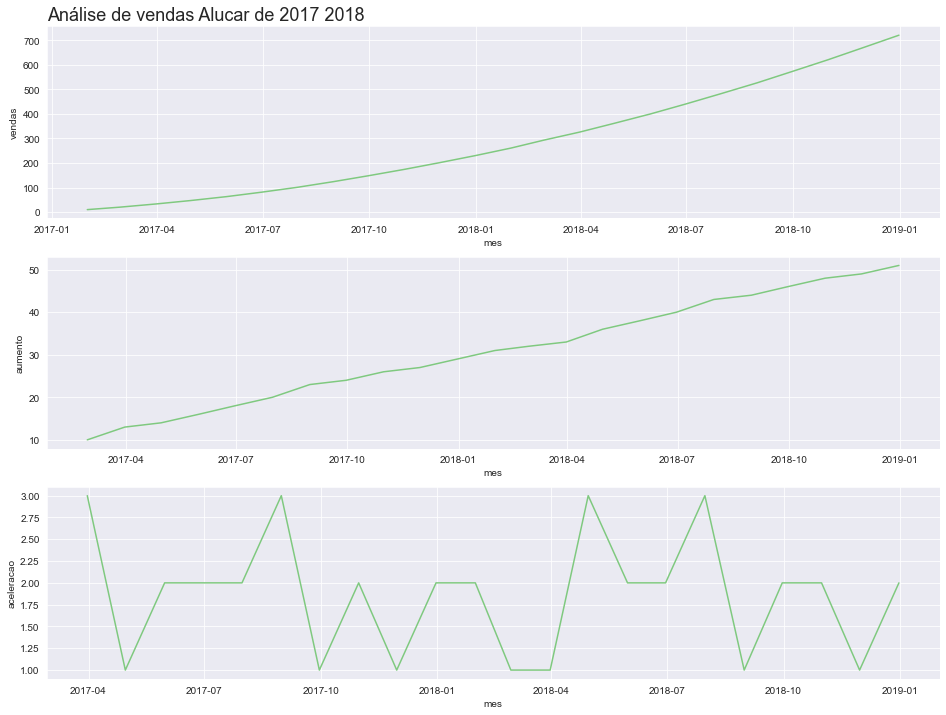

In [19]:
plot_comparacao(x='mes', y1='vendas', y2='aumento', y3='aceleracao', dataset=alucar, titulo='Análise de vendas Alucar de 2017 2018')

# Autocorrelação

In [20]:
from pandas.plotting import autocorrelation_plot

In [21]:
alucar.head(2)

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN


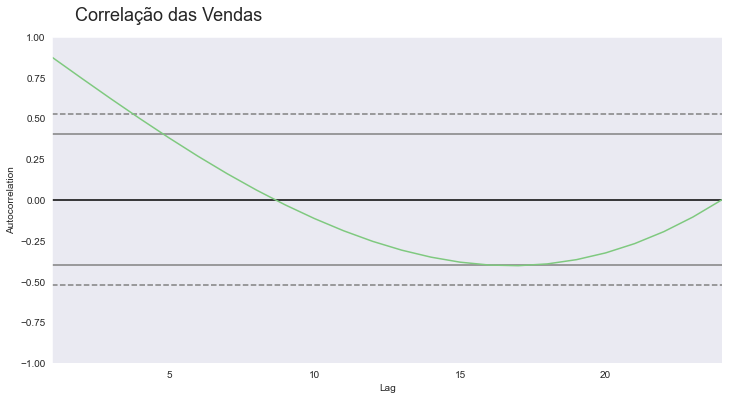

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

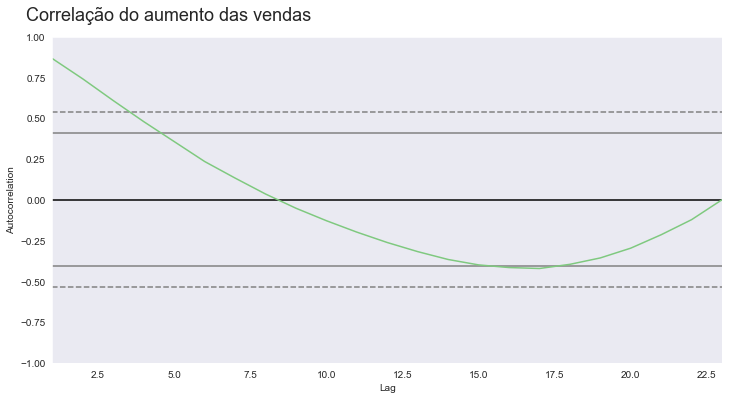

In [23]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

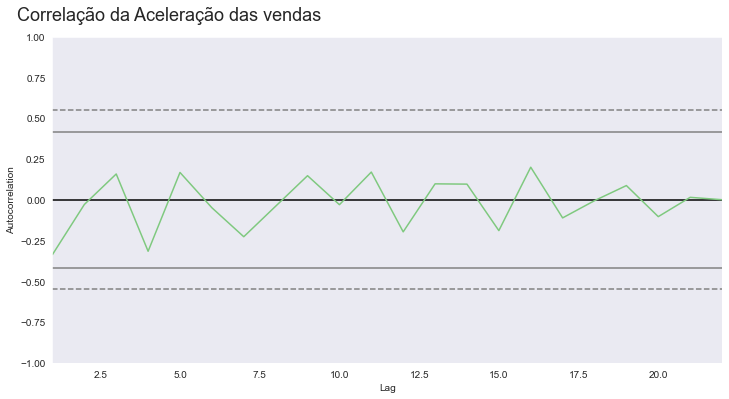

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [25]:
# Tabela de correlação:
autocorelacao = [ '1', '0,9 a 0,7', '0,7 a 0,4', '0,4 a 0,2', '0', '<0', '-1' ]
interpretacao =  [ 'correlação perfeita positiva', 'correlação forte', 'correlação moderada', 'correlação fraca', 'correlação nula', 'correlação negativa', 'correlação perfeita negativa' ]
data = {'Autocorrelação':autocorelacao,	'Interpretação':interpretacao}
tab_autocorr = pd.DataFrame(data=data)
tab_autocorr

,Autocorrelação,Interpretação
0,1,correlação perfeita positiva
1,"0,9 a 0,7",correlação forte
2,"0,7 a 0,4",correlação moderada
3,"0,4 a 0,2",correlação fraca
4,0,correlação nula
5,<0,correlação negativa
6,-1,correlação perfeita negativa


Fonte: https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o

# Alucar - Analisando assinantes da newsletter

In [26]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [27]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [28]:
print(f" Quantidade de linhas e colunas: {assinantes.shape}")
print(f" Quantidade de dados nulos: {assinantes.isna().sum().sum()}")

 Quantidade de linhas e colunas: (24, 2)
 Quantidade de dados nulos: 0


In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [30]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.fillna(0).head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,0.0,0.0
1,2017-02-28,10,10.0,0.0
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

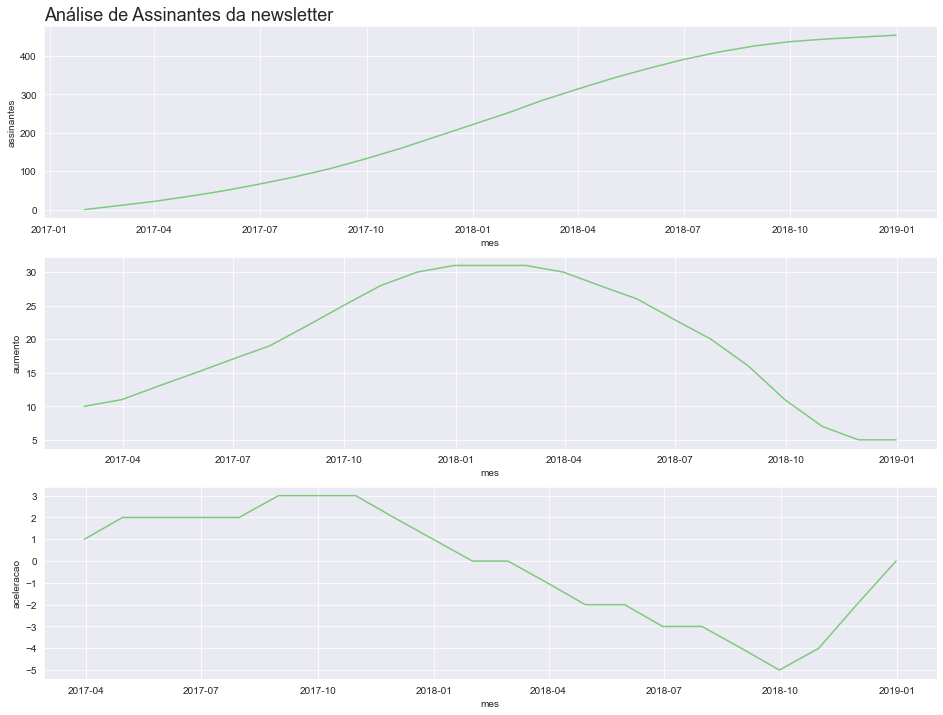

In [31]:
titulo = 'Análise de Assinantes da newsletter'
plot_comparacao(x='mes', y1='assinantes',y2='aumento',y3='aceleracao', dataset=assinantes, titulo=titulo)

# Chocolura - Analisando as vendas

In [32]:
chocolura = pd.read_csv('dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [33]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [34]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [35]:
def analise_dataframe(df):
    print(f" Quantidade de linhas e colunas: {df.shape}")
    print(f" Quantidade de dados nulos: {df.isna().sum().sum()}")

In [36]:
analise_dataframe(df=chocolura)

 Quantidade de linhas e colunas: (24, 2)
 Quantidade de dados nulos: 0


In [37]:
def decomposicao(df, col):
    _df = df
    _df[f'aumento'] = _df[f'{col}'].diff()
    _df[f'aceleracao'] = _df[f'aumento'].diff()
    _df.fillna(0, inplace=True)
    return df
    

In [38]:
decomposicao(df=chocolura, col='vendas').head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,0.0,0.0
1,2017-02-01,185,-25.0,0.0
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


<AxesSubplot:xlabel='mes', ylabel='aceleracao'>

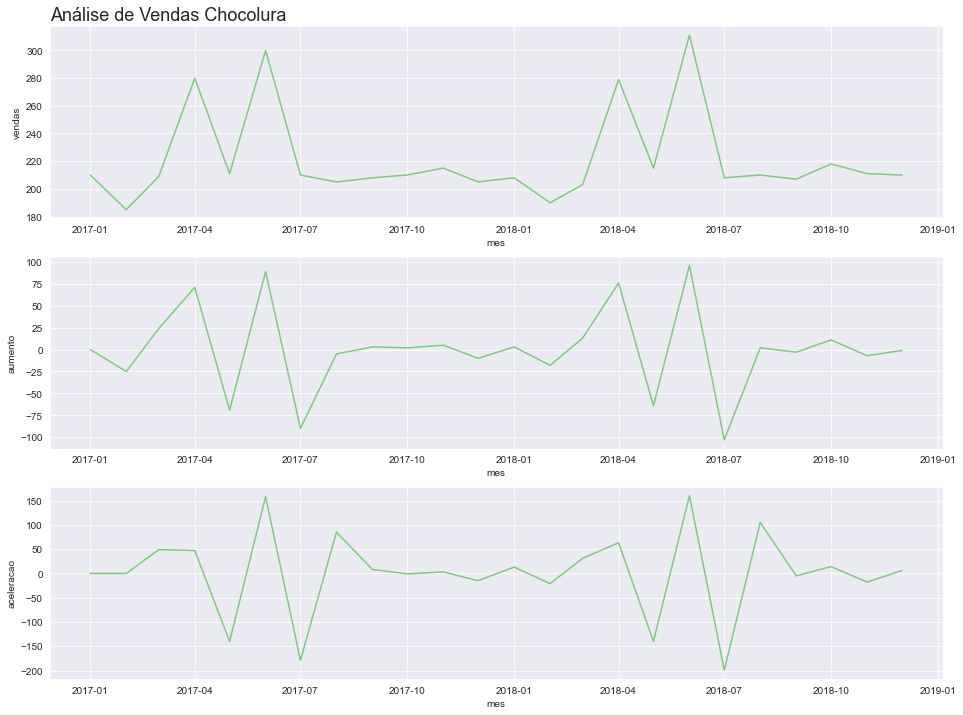

In [39]:
titulo = 'Análise de Vendas Chocolura'
plot_comparacao(x='mes', y1='vendas',y2='aumento',y3='aceleracao', dataset=chocolura, titulo=titulo)

A sazonalidade é um padrão repetitivo dentro de um determinado período fixo de tempo. Ou seja, sempre no mês 4 e no 6 a empresa venderá mais chocolate. Durante os demais meses, vende menos.

Esse comportamento é muito característico das séries temporais. Podemos vê-lo também no aumento. Há um aumento no mês 4 de acordo com o gráfico, e uma grande queda na sequência. Depois as vendas aumentam novamente no mês 6, e há queda de novo. Há uma relativa estabilidade até chegar novamente o mês de Abril do ano seguinte.

Até na aceleração do aumento das vendas é possível visualizar esse crescimento. isso significa que o padrão de sazonalidade é muito forte, pois se mantém em ambos os gráficos de aumento e aceleração.

Agora que já sabemos o que é sazonalidade, pensemos por que esse fenômeno ocorre nesses meses. No mês 4 de todos os anos costuma haver a data da Páscoa e em Junho, o Dia dos Namorados. As vendas de chocolates da Chocolura, pelo gráfico de vendas, é maior até em Junho do que em Abril.

Portanto, nessas datas, teremos essa sazonalidade muito evidente no nosso gráfico.

https://www.datascomemorativas.me/

# Chocolura - Vendas diárias (Outubro e Novembro)

In [40]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [41]:
analise_dataframe(df=vendas_por_dia)

 Quantidade de linhas e colunas: (61, 2)
 Quantidade de dados nulos: 0


In [42]:
def conv_dtype_tempo(df, col, quat_cer=0):
    print(f"Antes da Conversão")
    print(f"{df.dtypes}")
    df[f'{col}'] = pd.to_datetime(df[f'{col}'])
    print(f"\n{'#'*quat_cer}\n")
    print(f"Depois da Conversão")
    print(f"{df.dtypes}")
    return df


In [43]:
conv_dtype_tempo(df=vendas_por_dia, col='dia', quat_cer=50).head()

Antes da Conversão
dia       object
vendas     int64
dtype: object

##################################################

Depois da Conversão
dia       datetime64[ns]
vendas             int64
dtype: object


,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [44]:
decomposicao(df=vendas_por_dia, col='vendas').head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,0.0,0.0
1,2018-10-02,48,-2.0,0.0
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


<AxesSubplot:xlabel='dia', ylabel='aceleracao'>

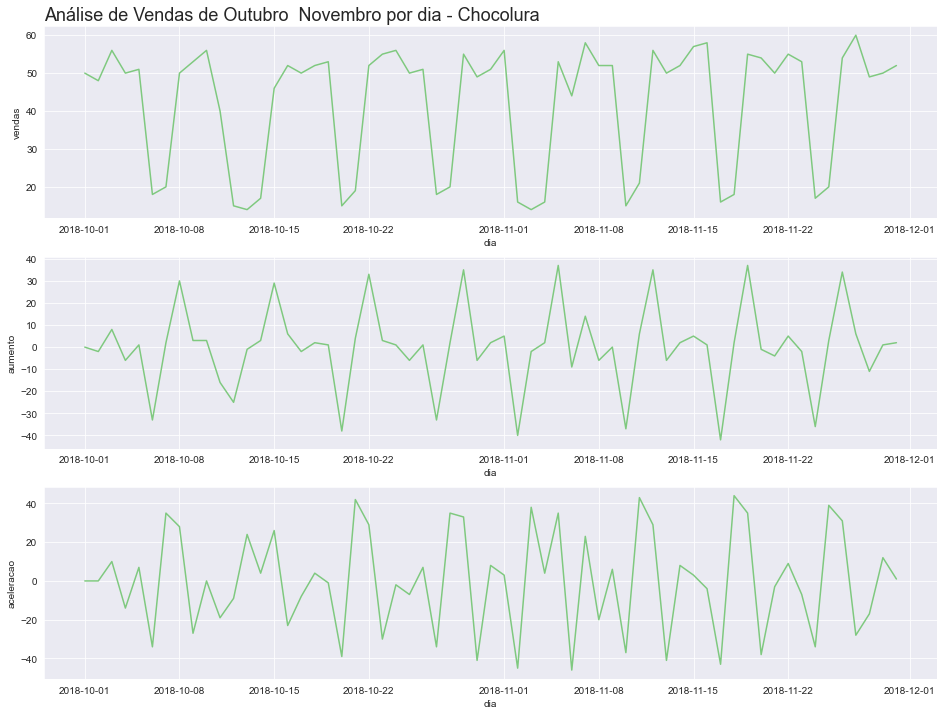

In [45]:
titulo = 'Análise de Vendas de Outubro  Novembro por dia - Chocolura'
plot_comparacao(x='dia', y1='vendas',y2='aumento',y3='aceleracao', dataset=vendas_por_dia, titulo=titulo)

**Analisando a Sazonalidade**

In [46]:
vendas_por_dia['dias_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,0.0,0.0,Monday
1,2018-10-02,48,-2.0,0.0,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [47]:
dias_em_en = vendas_por_dia['dias_da_semana'].unique().tolist()
dias_em_en

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [48]:
# Exemplo usando dict e zip
dias_em_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
chave = dias_em_en
valor = dias_em_pt
dias_traduzidos = dict( zip( chave, valor ) )
dias_traduzidos



{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sábado',
 'Sunday': 'Domingo'}

In [49]:
# Exemplo usando for
tamanho_da_lista = len(dias_em_pt)
dias_traduzidos_com_lacofor = dict()
for i in range(tamanho_da_lista):
    dias_traduzidos_com_lacofor[dias_em_en[i]] = dias_em_pt[i]
dias_traduzidos_com_lacofor

{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sábado',
 'Sunday': 'Domingo'}

In [50]:
# Exemplo usando list comprehension
tamanho_da_lista = len(dias_em_pt)
dias_traduzidos_com_listcomph = { dias_em_en[i]:dias_em_pt[i] for i in range(tamanho_da_lista)   }
dias_traduzidos_com_listcomph

{'Monday': 'Segunda',
 'Tuesday': 'Terça',
 'Wednesday': 'Quarta',
 'Thursday': 'Quinta',
 'Friday': 'Sexta',
 'Saturday': 'Sábado',
 'Sunday': 'Domingo'}

In [51]:
vendas_por_dia['dias_da_semana'] = vendas_por_dia['dias_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,0.0,0.0,Segunda
1,2018-10-02,48,-2.0,0.0,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo


In [52]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dias_da_semana
0,2018-10-01,50,0.0,0.0,Segunda
1,2018-10-02,48,-2.0,0.0,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [53]:
vendas_agrupadas = vendas_por_dia.groupby('dias_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_13976/469173658.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dias_da_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dias_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,30.0,27.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-30.0


***Correlação das vendas Diárias***

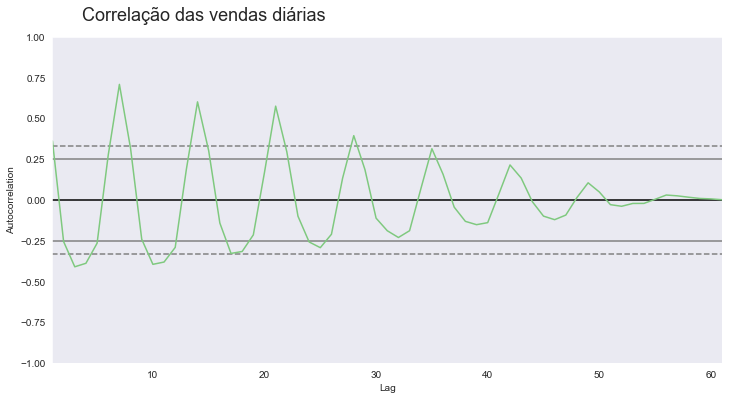

In [54]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

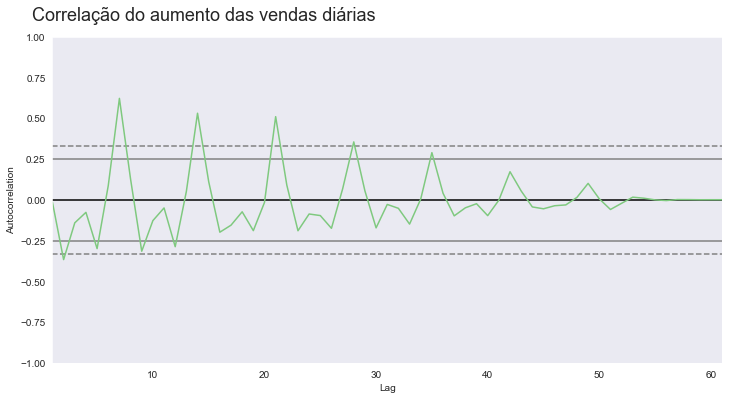

In [55]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'])
ax = ax

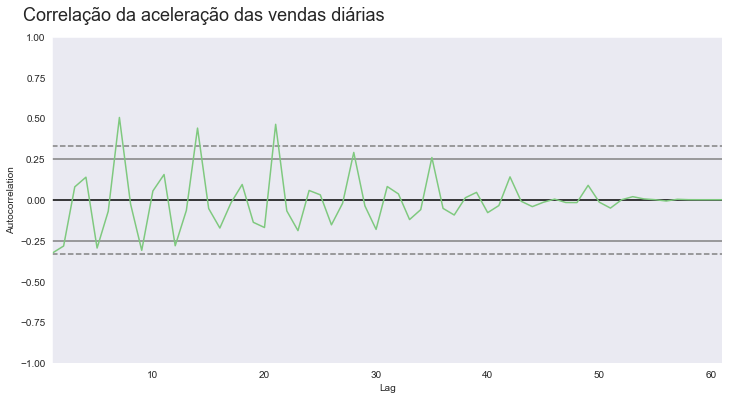

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'])
ax = ax

In [57]:
def plot_autocorr_comparacao(x, y, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(18,10))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='center')
    ax.set_title('Vendas', fontsize=12, loc='left')
    autocorrelation_plot( dataset[y1] ) 
    
    ax = plt.subplot(3,1,2)
    ax.set_title('Aumento', fontsize=12, loc='left')
    autocorrelation_plot( dataset[y2] ) 
    
    ax = plt.subplot(3,1,3)
    ax.set_title('Aceleração', fontsize=12, loc='left')
    autocorrelation_plot( dataset[y3] ) 
    ax = ax
    return ax

<AxesSubplot:title={'left':'Aceleração'}, xlabel='Lag', ylabel='Autocorrelation'>

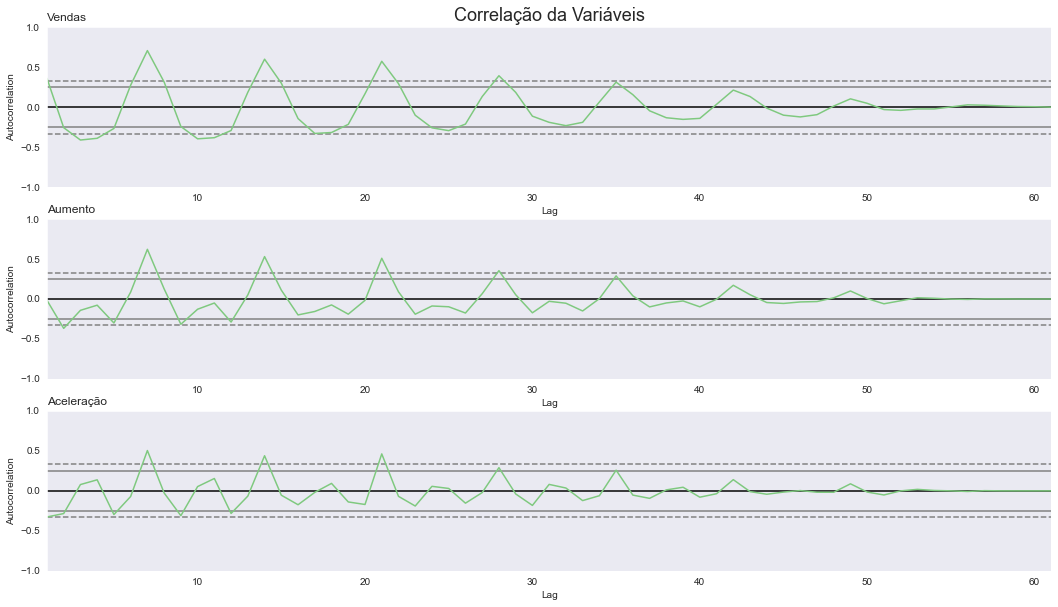

In [58]:
titulo = 'Correlação da Variáveis'
plot_autocorr_comparacao(x=0.35, y=0.95, y1='vendas',y2='aumento',y3='aceleracao', dataset=vendas_por_dia, titulo=titulo)

# Cafelura - Análise de Vendas

In [59]:
cafelura = pd.read_csv('dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [60]:
conv_dtype_tempo(df=cafelura, col='mes', quat_cer=50).head()

Antes da Conversão
mes       object
vendas     int64
dtype: object

##################################################

Depois da Conversão
mes       datetime64[ns]
vendas             int64
dtype: object


,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [61]:
analise_dataframe(df=cafelura)

 Quantidade de linhas e colunas: (24, 2)
 Quantidade de dados nulos: 0


<AxesSubplot:title={'left':'Vendas da Cafelura de 2017 e 2018'}, xlabel='Tempo', ylabel='Vendas'>

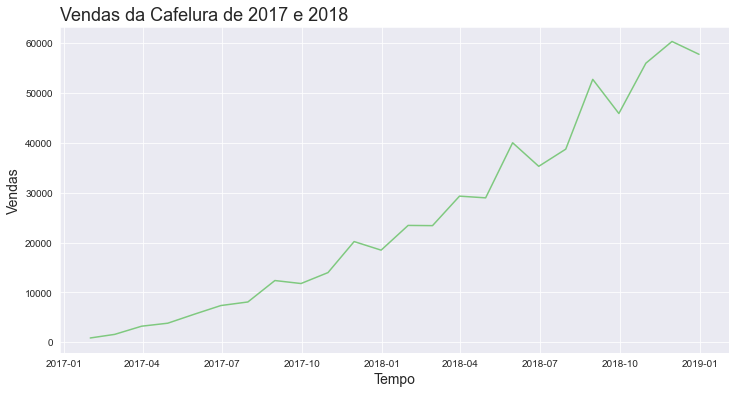

In [62]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas','mes','vendas', cafelura, 18, 14, 14)

In [63]:
quantidade_de_dias_de_fds = pd.read_csv('dados/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [64]:
analise_dataframe(df=quantidade_de_dias_de_fds)

 Quantidade de linhas e colunas: (24, 1)
 Quantidade de dados nulos: 0


In [65]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [66]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


<AxesSubplot:title={'left':'Vendas normalizadas da Cafelura de 2017 e 2018'}, xlabel='Tempo', ylabel='Vendas'>

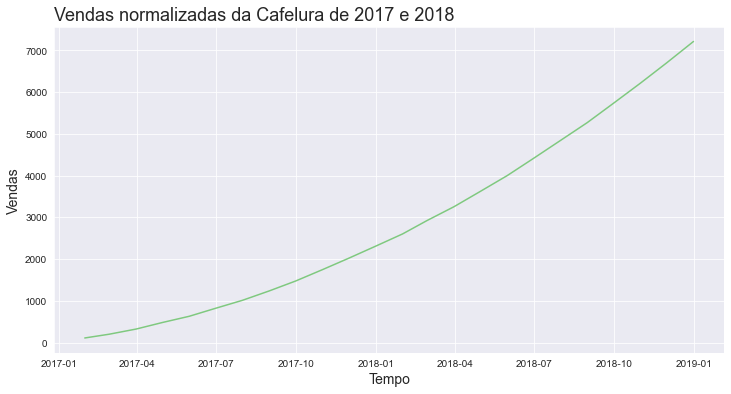

In [67]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas','mes','vendas_normalizadas', cafelura, 18, 14, 14)

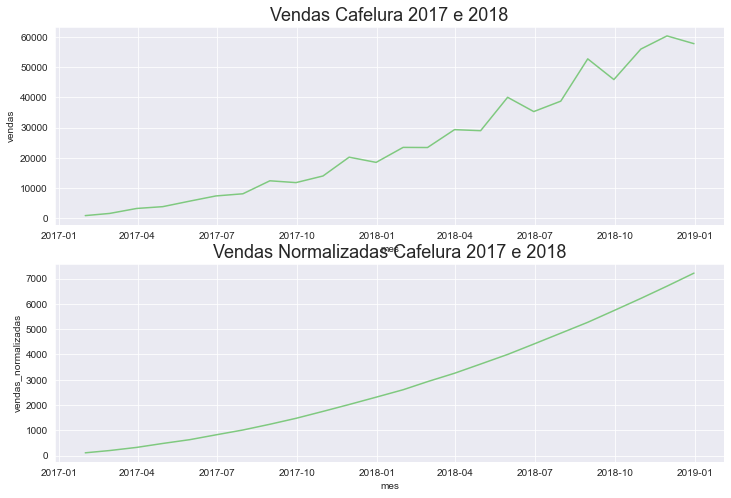

In [68]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

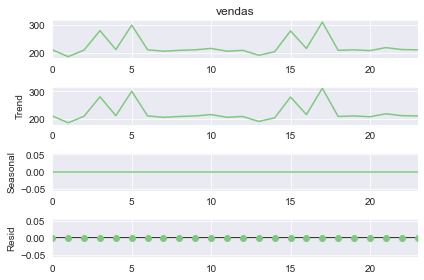

In [70]:
resultado = seasonal_decompose( chocolura['vendas'], period=1 )
ax = resultado.plot()

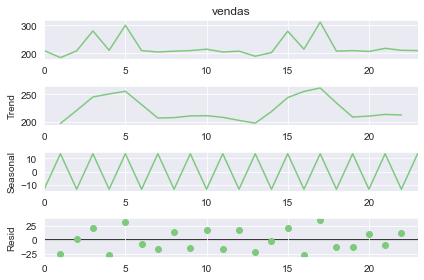

In [71]:
resultado = seasonal_decompose( chocolura['vendas'], period=2 )
ax = resultado.plot()

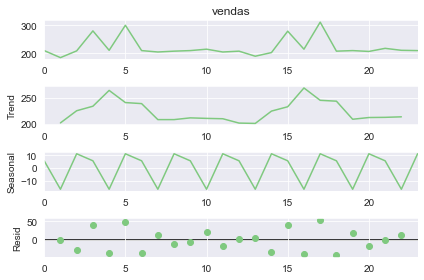

In [72]:
resultado = seasonal_decompose( chocolura['vendas'], period=3 )
ax = resultado.plot()

In [73]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [74]:
data = ({'observacao':observacao, 'tendencia':tendencia, 'sazonalidade':sazonalidade, 'ruido':ruido})

In [75]:
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


<AxesSubplot:ylabel='ruido'>

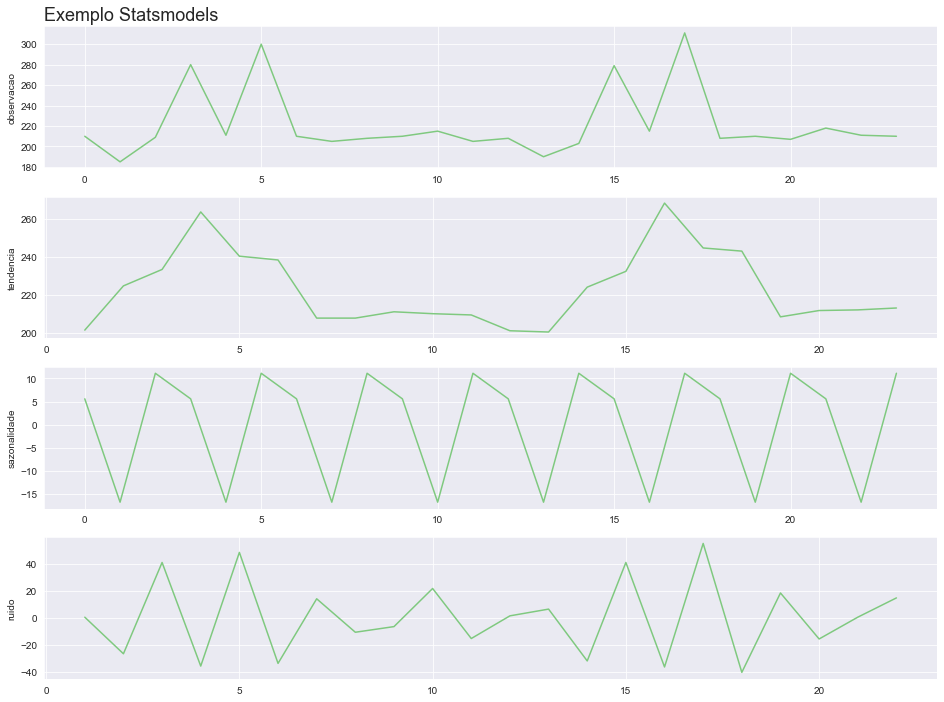

In [78]:
titulo = 'Exemplo Statsmodels'
plot_comparacao(x=resultado.index, y1='observacao',y2='tendencia',y3='sazonalidade', y4='ruido', params=True, dataset=resultado, titulo=titulo)

# Alucel - Análise de vendas

In [80]:
alucel = pd.read_csv('dados/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [81]:
analise_dataframe(df=alucel)

 Quantidade de linhas e colunas: (61, 2)
 Quantidade de dados nulos: 0


In [83]:
conv_dtype_tempo(df=alucel, col='dia', quat_cer=50).head()

Antes da Conversão
dia        object
vendas    float64
dtype: object

##################################################

Depois da Conversão
dia       datetime64[ns]
vendas           float64
dtype: object


,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [84]:
decomposicao(df=alucel, col='vendas').head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,0.00,0.00
1,2018-10-02,2185.69,810.86,0.00
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


<AxesSubplot:xlabel='dia', ylabel='aceleracao'>

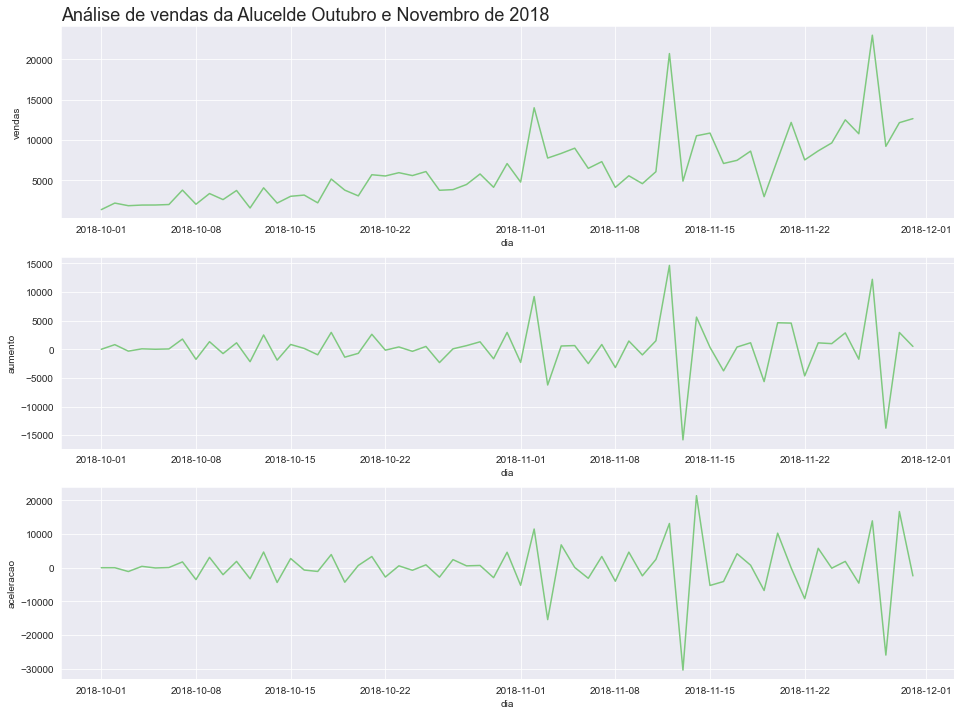

In [86]:
titulo = 'Análise de vendas da Alucelde Outubro e Novembro de 2018'
plot_comparacao(x='dia', y1='vendas', y2='aumento', y3='aceleracao', dataset=alucel, titulo=titulo)

# Ruido - Utilizando a média movelpara normalizar os dados.

In [88]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,0.00,0.00,NaN
1,2018-10-02,2185.69,810.86,0.00,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


<AxesSubplot:title={'left':'Análise de venda com média móvel de 7 dias'}, xlabel='Tempo', ylabel='Media Móvel'>

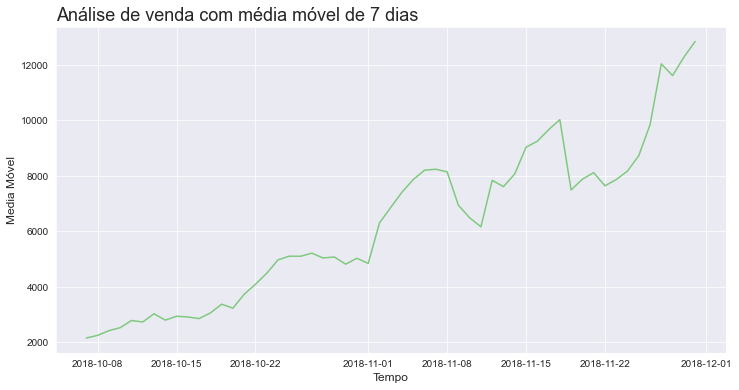

In [89]:
titulo = 'Análise de venda com média móvel de 7 dias'
labelx='Tempo' 
labely='Media Móvel'
plotar(dataset=alucel, x='dia', y='media_movel',titulo=titulo, labelx=labelx, labely=labely, fontt=18, fontlx=12, fontly=12  )

In [90]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
alucel.head(21)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,0.00,0.00,NaN,NaN
1,2018-10-02,2185.69,810.86,0.00,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


<AxesSubplot:title={'left':'Análise de venda com média móvel de 21 dias'}, xlabel='Tempo', ylabel='Media Móvel'>

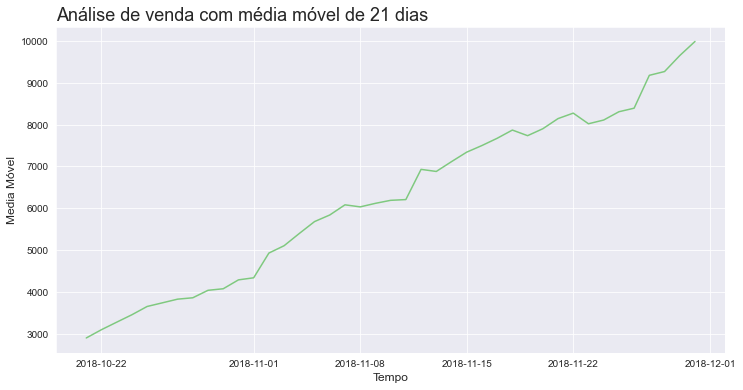

In [91]:
titulo = 'Análise de venda com média móvel de 21 dias'
labelx='Tempo' 
labely='Media Móvel'
plotar(dataset=alucel, x='dia', y='media_movel_21',titulo=titulo, labelx=labelx, labely=labely, fontt=18, fontlx=12, fontly=12  )

In [92]:
# Exportando arquivo para excel.
alucel.to_excel("aluce_output.xlsx",
             sheet_name='dataframe') 

<AxesSubplot:xlabel='dia', ylabel='media_movel_21'>

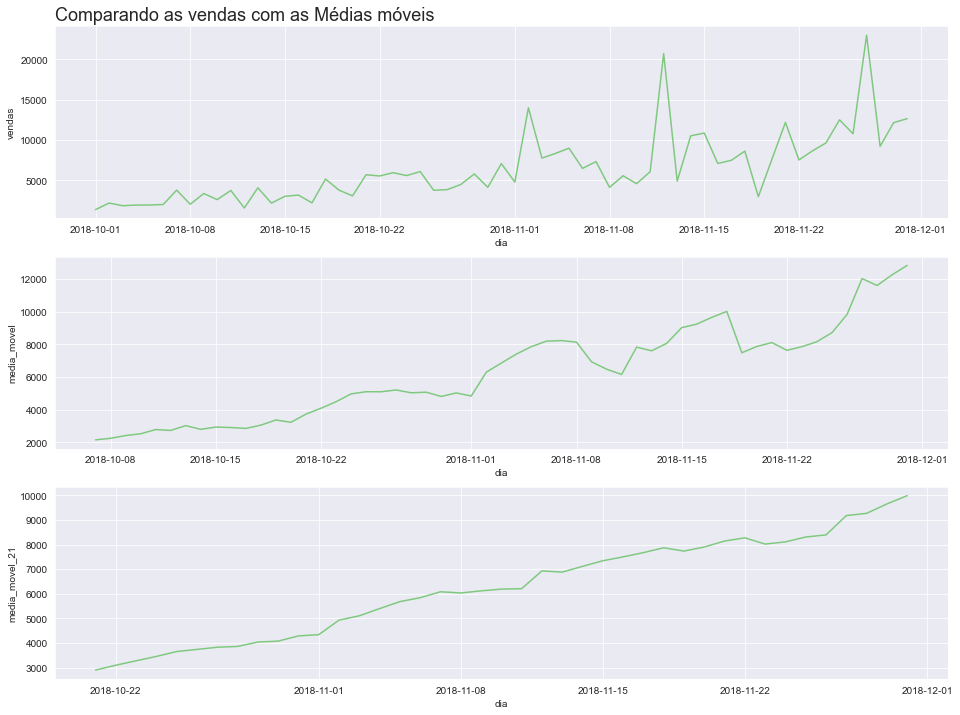

In [95]:
titulo = 'Comparando as vendas com as Médias móveis'
plot_comparacao(dataset=alucel, x='dia', y1='vendas', y2='media_movel', y3='media_movel_21', titulo=titulo )


Aprendemos que um componente presente na maioria das Time Series é o ruído

Vimos que podemos minimizar os ruídos de uma time series aplicando a técnica da média móvel

Criamos um gráfico com a média móvel de 7 e 21 dias e comparamos com nossa observação, conforme ilustra a imagem abaixo